Problem : To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing Skin Cancer Data**

**Importing all the important libraries**

In [ ]:
import pathlib

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/My Drive/CNN_assignment.zip" -d "/content/drive/My Drive/Data/cnn"

In [ ]:
data_dir_train = pathlib.Path("/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.



Create a dataset
Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180


In [ ]:
## loading train dataset here
## Note using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, images resized to the size 180*180, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
## loading Validation dataset here
## Note using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, images resized to the size 180*180, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
## loading Test dataset here
## Note using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, images resized to the size 180*180, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,    
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**

code to visualize one instance of all the nine classes present in the dataset

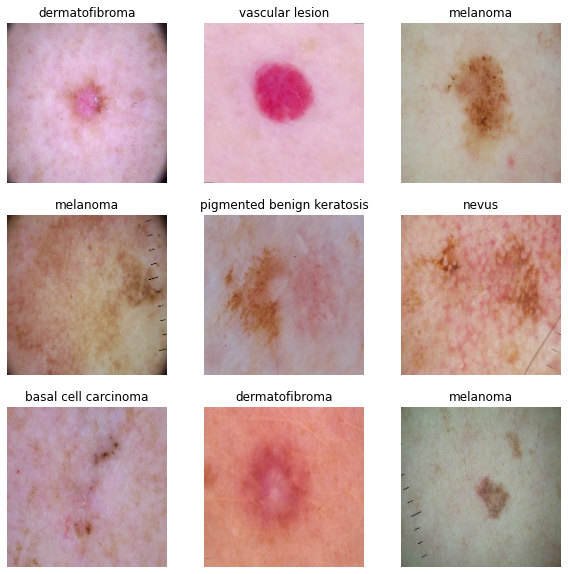

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). 

This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 

The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Creating the model**

CNN model, to detect 9 classes present in the dataset. 

Using layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

**Compile the model**

'adam' optimiser and 'SparseCategoricalCrossentropy' loss function for model training

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

**Train Model**

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 684s 838ms/step - loss: 1.9252 - accuracy: 0.2474 - val_loss: 1.6778 - val_accuracy: 0.3615
Epoch 2/20
169/169 [==============================] - 8s 45ms/step - loss: 1.5554 - accuracy: 0.4002 - val_loss: 1.4092 - val_accuracy: 0.4588
Epoch 3/20
169/169 [==============================] - 7s 44ms/step - loss: 1.3446 - accuracy: 0.4963 - val_loss: 1.4712 - val_accuracy: 0.4744
Epoch 4/20
169/169 [==============================] - 8s 45ms/step - loss: 1.2036 - accuracy: 0.5534 - val_loss: 1.3308 - val_accuracy: 0.4937
Epoch 5/20
169/169 [==============================] - 7s 44ms/step - loss: 1.0367 - accuracy: 0.6196 - val_loss: 1.1580 - val_accuracy: 0.5895
Epoch 6/20
169/169 [==============================] - 8s 45ms/step - loss: 0.8767 - accuracy: 0.6836 - val_loss: 1.0206 - val_accuracy: 0.6592
Epoch 7/20
169/169 [==============================] - 7s 44ms/step - loss: 0.7605 - accuracy: 0.7237 - val_loss: 0.9275 - val_accuracy: 0.6

In [ ]:
# summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

**Visualizing training results**

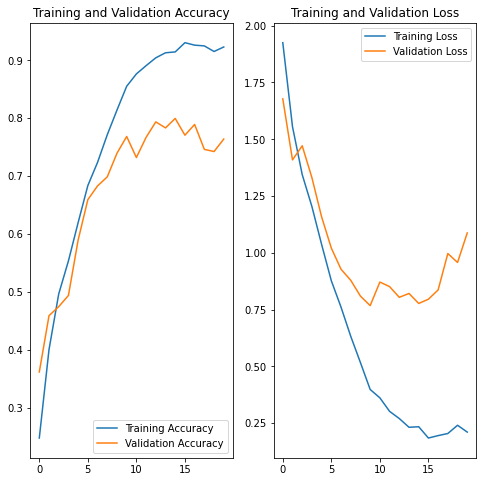

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Evaluate model
loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

43/43 [==============================] - 1s 18ms/step - loss: 1.0874 - accuracy: 0.7639
Accuracy 0.7639198303222656


**Observations**

From the plots, it can be observed
training accuracy is increasing linearly however validation accuracy is comparatively.

This is sign of overfitting - could be because number of training examples are low and more noise is captured.

Data augmentation can help random transformations to generalize data.
Dropout can also help reduce overfitting - by regularizing data.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Visualization** to see how augmentation strategy works for one instance of training image

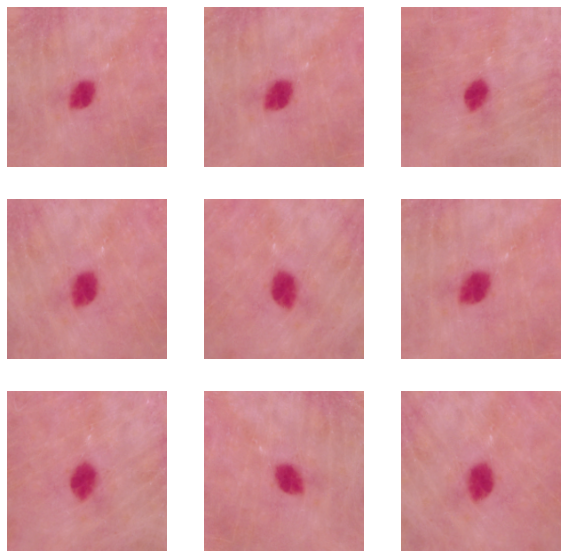

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Creating model with augmentation and dropout

In [ ]:
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

**Compile the model**

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 10s 53ms/step - loss: 1.9340 - accuracy: 0.2723 - val_loss: 1.5672 - val_accuracy: 0.4224
Epoch 2/20
169/169 [==============================] - 9s 51ms/step - loss: 1.5468 - accuracy: 0.4097 - val_loss: 1.5073 - val_accuracy: 0.4172
Epoch 3/20
169/169 [==============================] - 9s 51ms/step - loss: 1.4156 - accuracy: 0.4642 - val_loss: 1.3897 - val_accuracy: 0.4647
Epoch 4/20
169/169 [==============================] - 9s 51ms/step - loss: 1.3508 - accuracy: 0.4865 - val_loss: 1.2793 - val_accuracy: 0.5056
Epoch 5/20
169/169 [==============================] - 9s 51ms/step - loss: 1.2705 - accuracy: 0.5184 - val_loss: 1.3187 - val_accuracy: 0.5056
Epoch 6/20
169/169 [==============================] - 9s 51ms/step - loss: 1.2298 - accuracy: 0.5313 - val_loss: 1.1629 - val_accuracy: 0.5694
Epoch 7/20
169/169 [==============================] - 9s 51ms/step - loss: 1.1911 - accuracy: 0.5560 - val_loss: 1.2137 - val_accuracy: 0.533

In [ ]:
#Evaluate model
loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

43/43 [==============================] - 1s 19ms/step - loss: 0.7753 - accuracy: 0.7268
Accuracy 0.7268003225326538


**Observations**

From the plots, it can be observed training accuracy has degraded and also the validation accuracy.

This could be becase of class imbalance.

Data augmentation can help 

**check class distribution**

In [ ]:
def count_class(counts, batch, num_classes=9):
   
    for i in range(num_classes):
        cc = tf.cast(labels == i, tf.int32)
        counts[i] += tf.reduce_sum(cc)
    return counts

In [ ]:
initial_state = dict((i, 0) for i in range(9))
counts = train_ds.reduce(initial_state=initial_state, reduce_func=count_class)

print([(k, v.numpy()) for k, v in counts.items()])

[(0, 338), (1, 507), (2, 1014), (3, 676), (4, 676), (5, 507), (6, 338), (7, 676), (8, 676)]


In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset="/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

In [ ]:

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6608362E10>: 100%|██████████| 500/500 [00:22<00:00, 22.43 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66080BB4D0>: 100%|██████████| 500/500 [00:21<00:00, 22.88 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66080141D0>: 100%|██████████| 500/500 [00:22<00:00, 22.00 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7F6607F8DD50>: 100%|██████████| 500/500 [01:51<00:00,  4.49 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F6684A60A10>: 100%|██████████| 500/500 [01:43<00:00,  4.84 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6607FBBD10>: 100%|██████████| 500/500 [00:22<00:00, 22.04 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F66704D06D0>: 100%|██████████| 500/500 [00:49<00:00, 10.17 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6605C6B990>: 100%|██████████| 500/500 [00:22<00:00, 22.64 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6607FAA290>: 100%|██████████| 500/500 [00:21<00:00, 23.47 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031335.jpg_ef04fedd-9c76-4f00-aa09-9f575ae176c2.jpg',
 '/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031922.jpg_535ed35b-da4c-4b06-a88f-4c34fc4ec351.jpg',
 '/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033456.jpg_c2edada7-e485-4bc3-b520-a530caa9e77e.jpg',
 '/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_efe79f37-519c-4d11-b542-fcda14e66c02.jpg',
 '/content/drive/My Drive/Data/cnn/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic kera

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [ ]:
df2['Label'].value_counts()

basal cell carcinoma          500
pigmented benign keratosis    500
actinic keratosis             500
dermatofibroma                500
vascular lesion               500
melanoma                      500
squamous cell carcinoma       500
seborrheic keratosis          500
nevus                         500
Name: Label, dtype: int64

Train model on augmented data

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

create training dataset

In [ ]:
data_dir_train= path_to_training_dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Create a validation dataset

In [ ]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Create model 
- includes normalization

In [ ]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Compile model 

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 41s 230ms/step - loss: 1.7229 - accuracy: 0.3466 - val_loss: 1.4417 - val_accuracy: 0.4662
Epoch 2/20
169/169 [==============================] - 40s 229ms/step - loss: 1.3551 - accuracy: 0.4996 - val_loss: 1.2743 - val_accuracy: 0.5449
Epoch 3/20
169/169 [==============================] - 40s 231ms/step - loss: 1.1783 - accuracy: 0.5532 - val_loss: 1.1714 - val_accuracy: 0.5620
Epoch 4/20
169/169 [==============================] - 40s 230ms/step - loss: 1.0037 - accuracy: 0.6367 - val_loss: 1.0939 - val_accuracy: 0.6080
Epoch 5/20
169/169 [==============================] - 40s 227ms/step - loss: 0.8473 - accuracy: 0.6934 - val_loss: 1.1035 - val_accuracy: 0.5991
Epoch 6/20
169/169 [==============================] - 44s 254ms/step - loss: 0.6901 - accuracy: 0.7580 - val_loss: 1.1063 - val_accuracy: 0.6347
Epoch 7/20
169/169 [==============================] - 43s 247ms/step - loss: 0.6475 - accuracy: 0.7743 - val_loss: 0.8849 - val_ac

Visualize the model results

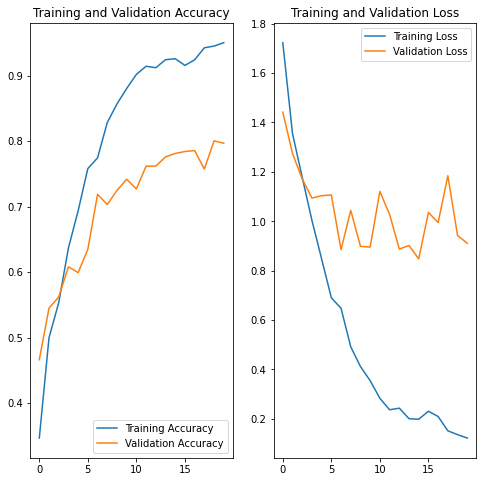

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations**
- training accuray ~95% and validation acuuracy ~80%
Even after the data is augmented though the train accuracy is good; 
- validation accuracy is not good comparative to training accuracy.
- Still the model seems to be overfit.
- verifying with dropout added in below model to see if it improves test accuracy



Creating Model with more customization
- adding dropout function

In [ ]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),  
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Compile Model

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 42s 240ms/step - loss: 1.8318 - accuracy: 0.3030 - val_loss: 1.5066 - val_accuracy: 0.4336
Epoch 2/20
169/169 [==============================] - 45s 258ms/step - loss: 1.4402 - accuracy: 0.4496 - val_loss: 1.5377 - val_accuracy: 0.4388
Epoch 3/20
169/169 [==============================] - 43s 244ms/step - loss: 1.2788 - accuracy: 0.5182 - val_loss: 1.2641 - val_accuracy: 0.5249
Epoch 4/20
169/169 [==============================] - 43s 245ms/step - loss: 1.1043 - accuracy: 0.5899 - val_loss: 1.0650 - val_accuracy: 0.5939
Epoch 5/20
169/169 [==============================] - 42s 240ms/step - loss: 0.9533 - accuracy: 0.6486 - val_loss: 1.2331 - val_accuracy: 0.5746
Epoch 6/20
169/169 [==============================] - 41s 236ms/step - loss: 0.8025 - accuracy: 0.7044 - val_loss: 0.8911 - val_accuracy: 0.6912
Epoch 7/20
169/169 [==============================] - 40s 231ms/step - loss: 0.6585 - accuracy: 0.7563 - val_loss: 0.9304 - val_ac

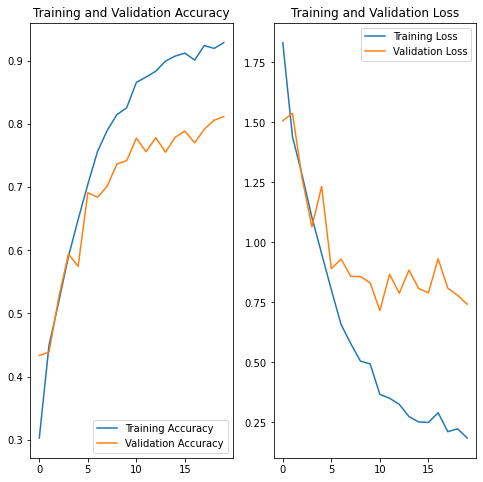

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observation:
 - training accuray ~91% and validation acuuracy ~82%
 - Verified with drop out it reduces overfitting. 
 - But it can be improved further.